Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

150 samples, with 4 attributes (same units, all numeric)

Balanced class distribution (50 samples for each class)

No missing data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [74]:
X, y = load_iris(return_X_y=True)
x_col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_col_name = ['species']
classes = ['Setosa', 'Versicolour', 'Virginica']
X = pd.DataFrame(X, columns=x_col_names )
y = pd.DataFrame(y, columns=y_col_name)

In [19]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
data = X.join(y)

In [76]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
data.shape

(150, 5)

In [78]:
data['species'].replace(0,classes[0], inplace=True)
data['species'].replace(1,classes[1], inplace=True)
data['species'].replace(2,classes[2], inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## EDA

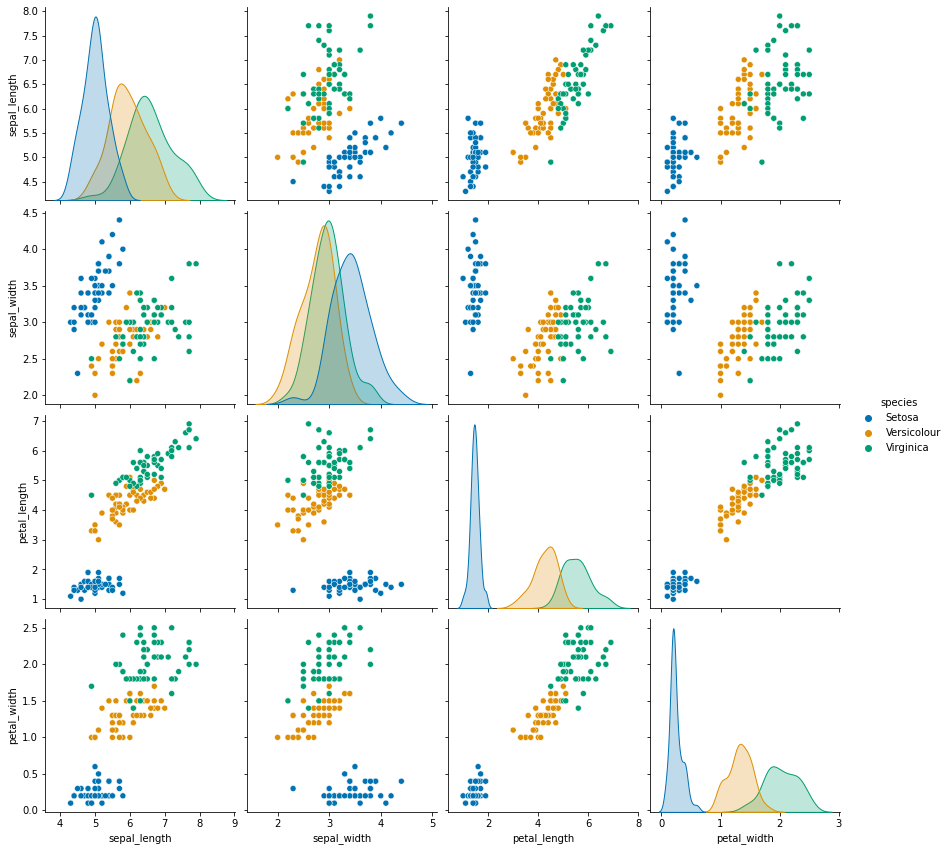

In [79]:
sns.pairplot(data, hue="species", height = 3, palette = 'colorblind')


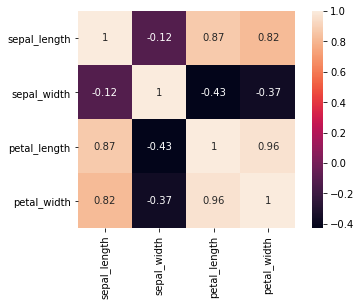

In [80]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

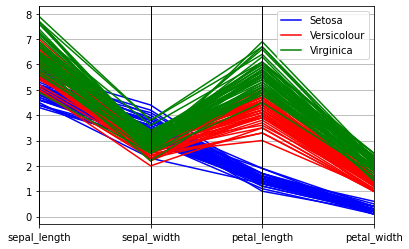

In [81]:
parallel_coordinates(data, "species", color = ['blue', 'red', 'green']);

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

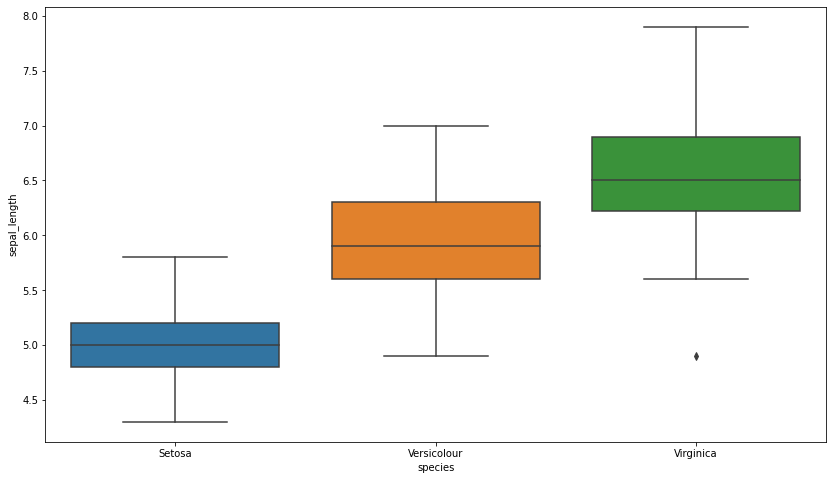

In [87]:
fig, ax=plt.subplots(figsize=(14, 8))
sns.boxplot(x="species", y="sepal_length", data=data, ax=ax)

#

In [85]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

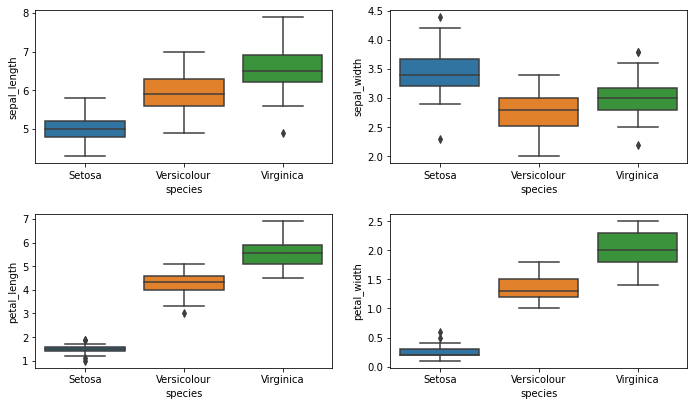

In [98]:
fig, [(axes0, axes1), (axes2, axes3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))
sns.boxplot(x = 'species', y = 'sepal_length', data = data,  ax = axes0);
sns.boxplot(x = 'species', y = 'sepal_width', data = data, ax = axes1);
sns.boxplot(x = 'species', y = 'petal_length', data = data, ax = axes2);
sns.boxplot(x = 'species', y = 'petal_width', data = data, ax = axes3);
# add some spacing between subplots
fig.tight_layout(pad=2.0);
plt.show()

## Classification: Decision Tree

In [61]:
y = data[['species']]
X = data.drop(columns='species', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [64]:
DT = DecisionTreeClassifier(max_depth = 3, random_state = 42)
DT.fit(X_train,y_train)
prediction = DT.predict(X_test)
print("The accuracy of the Decision Tree is {:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.978


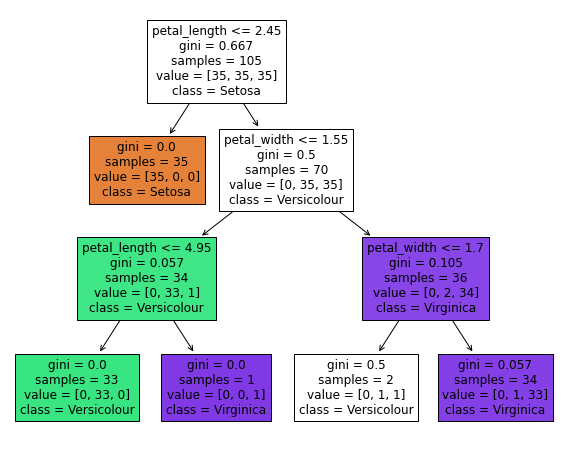

In [67]:
plt.figure(figsize = (10,8))
plot_tree(DT, feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"], class_names = classes, filled = True);

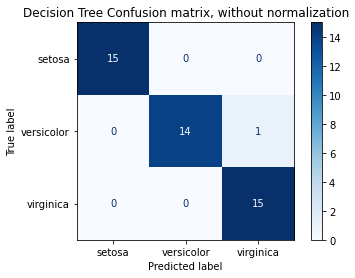

In [99]:
disp = metrics.plot_confusion_matrix(DT, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');